In [100]:
import os
import pickle

article_list = os.listdir('articles')

articles = []
for article_name in article_list:
    article = pickle.load( open("articles/"+article_name, "rb" ) )
    if len(article["text"]) < 300:
        continue

    articles.append(article)
print("Droped: "+ str(len(articles) / len(article_list))+ "%")

Droped: 0.84185303514377%


In [101]:
# Create a big document for each of the newspapers
newspapers = set([article["newspaper"] for article in articles])

newspaper_counts = {key : 0 for key in newspapers}
newspaper_docs = {key : "" for key in newspapers}

for article in articles:
    newspaper_docs[article["newspaper"]] += article["text"]+" "
    newspaper_counts[article["newspaper"]] +=1

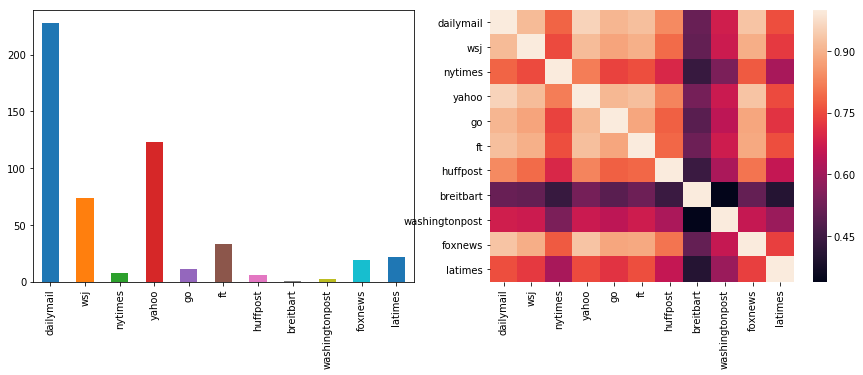

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(smooth_idf=True,use_idf=True)
tfidf_result = tfidf.fit_transform(newspaper_docs.values())

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_result, tfidf_result)
cosine_similarities

similarities_df = pd.DataFrame(cosine_similarities, columns=newspaper_docs.keys(), index=newspaper_docs.keys())
similarities_df.set_index(list(newspaper_docs.keys()))
newspaper_counts_df = pd.Series(newspaper_counts)

import seaborn as sns
from matplotlib import pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

newspaper_counts_df.plot(kind="bar", ax=ax1)

sns.heatmap(similarities_df, ax=ax2)

plt.show()


In [103]:
newspaper_counts_df

dailymail         228
wsj                74
nytimes             8
yahoo             123
go                 11
ft                 33
huffpost            6
breitbart           1
washingtonpost      2
foxnews            19
latimes            22
dtype: int64